# Market Key Levels
Key levels in the market typically refer to significant price levels where a stock or other financial instrument has historically shown support or resistance. These levels can be identified through technical analysis and are often closely watched by traders and investors.

In [1]:
# import all necessary modules
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
%matplotlib inline
plt.figure(figsize=(12, 6), facecolor='blue', edgecolor='orange', dpi=600)

<Figure size 7200x3600 with 0 Axes>

<Figure size 7200x3600 with 0 Axes>

## Data Preprocessing

In [2]:
df = pd.read_csv('data/XAUUSDdaily.csv', parse_dates=['Date'], index_col='Date')
df['Date'] = df.index
display(df.head())

,Price,Open,High,Low,Vol.,Change %,Date
Date,,,,,,,
2023-03-06,"1,854.72","1,852.51","1,855.26","1,850.96",NaN,0.12%,2023-03-06
2023-03-05,"1,852.43","1,854.24","1,854.89","1,852.22",NaN,-0.14%,2023-03-05
2023-03-03,"1,854.97","1,836.10","1,856.47","1,834.51",NaN,1.03%,2023-03-03
2023-03-02,"1,836.00","1,837.20","1,838.94","1,829.44",NaN,-0.04%,2023-03-02
2023-03-01,"1,836.81","1,827.24","1,845.05","1,823.05",NaN,0.53%,2023-03-01


In [3]:
df.columns = ['close', 'open', 'high', 'low', 'volume', 'change', 'date']
df.head()

,close,open,high,low,volume,change,date
Date,,,,,,,
2023-03-06,"1,854.72","1,852.51","1,855.26","1,850.96",NaN,0.12%,2023-03-06
2023-03-05,"1,852.43","1,854.24","1,854.89","1,852.22",NaN,-0.14%,2023-03-05
2023-03-03,"1,854.97","1,836.10","1,856.47","1,834.51",NaN,1.03%,2023-03-03
2023-03-02,"1,836.00","1,837.20","1,838.94","1,829.44",NaN,-0.04%,2023-03-02
2023-03-01,"1,836.81","1,827.24","1,845.05","1,823.05",NaN,0.53%,2023-03-01


In [4]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1344 entries, 2023-03-06 to 2018-01-08
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   close   1344 non-null   object        
 1   open    1344 non-null   object        
 2   high    1344 non-null   object        
 3   low     1344 non-null   object        
 4   change  1344 non-null   object        
 5   date    1344 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 73.5+ KB


In [5]:
start_date = "2020-01-01"
end_date = "2023-03-06"
mask = (df['date'] > start_date) & (df['date'] <= end_date)
df = df.loc[mask]
df.head()

,close,open,high,low,change,date
Date,,,,,,
2023-03-06,"1,854.72","1,852.51","1,855.26","1,850.96",0.12%,2023-03-06
2023-03-05,"1,852.43","1,854.24","1,854.89","1,852.22",-0.14%,2023-03-05
2023-03-03,"1,854.97","1,836.10","1,856.47","1,834.51",1.03%,2023-03-03
2023-03-02,"1,836.00","1,837.20","1,838.94","1,829.44",-0.04%,2023-03-02
2023-03-01,"1,836.81","1,827.24","1,845.05","1,823.05",0.53%,2023-03-01


In [6]:
def replace_comma(x):
    if isinstance(x, str):
        return float(x.replace(',', ''))
    else:
        return x

cols = ['close', 'high', 'low', 'open']
df[cols] = df[cols].applymap(replace_comma).astype('float64')

df.dtypes

close            float64
open             float64
high             float64
low              float64
change            object
date      datetime64[ns]
dtype: object

## Feature Engineering


#### Support & Resistance 

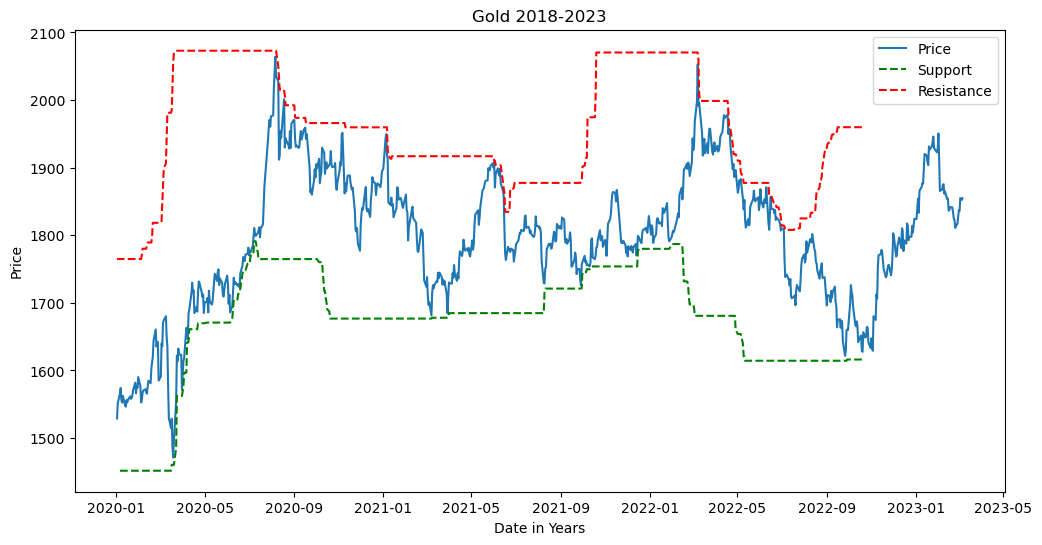

In [7]:
# Determine the trend
"""To determn the trend we will use the 21ma"""
trend = 'uptrend' # or 'downtrend' or 'sideways'

def support_resistance(data, window=20):
    support = data['low'].rolling(window=window).min()
    resistance = data['high'].rolling(window=window).max()
    return support, resistance

support, resistance = support_resistance(df, 100)

# Plot the levels
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Price')
plt.title('Gold 2018-2023')
plt.ylabel('Price')
plt.xlabel('Date in Years')
plt.plot(support, label='Support', linestyle='--', color='green')
plt.plot(resistance, label='Resistance', linestyle='--', color='red')
plt.legend()
plt.show()


In [8]:
df['support'] = support
df['resistance'] = resistance
df.head()

,close,open,high,low,change,date,support,resistance
Date,,,,,,,,
2023-03-06,1854.72,1852.51,1855.26,1850.96,0.12%,2023-03-06,NaN,NaN
2023-03-05,1852.43,1854.24,1854.89,1852.22,-0.14%,2023-03-05,NaN,NaN
2023-03-03,1854.97,1836.10,1856.47,1834.51,1.03%,2023-03-03,NaN,NaN
2023-03-02,1836.00,1837.20,1838.94,1829.44,-0.04%,2023-03-02,NaN,NaN
2023-03-01,1836.81,1827.24,1845.05,1823.05,0.53%,2023-03-01,NaN,NaN


##### Major Key Levels

In [9]:
ms = df.support.value_counts()
mr = df.resistance.value_counts()
major_support =  ms[ms >= 42].keys()
major_resistance = mr[mr >= 42].keys()
major_resistance, major_support

(Float64Index([2072.9, 1916.84, 2070.29, 1877.4, 1959.6], dtype='float64'),
 Float64Index([1614.35, 1676.7, 1684.77, 1764.69, 1451.68, 1753.84], dtype='float64'))

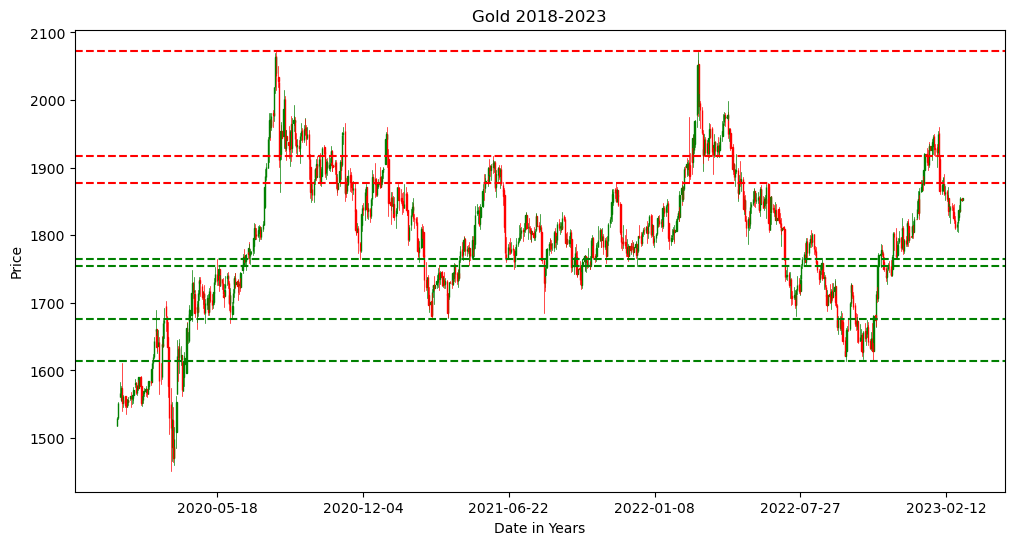

In [10]:


fig, ax = plt.subplots(figsize=(12, 6))

ohlc = df.loc[:, ['open', 'high', 'low', 'close']]
ohlc.index.name = 'Date'
ohlc.reset_index(inplace=True)
ohlc.loc[:, 'Date'] = ohlc['Date'].map(mdates.date2num)

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Define the minimum distance between levels
min_distance = 50

# Plot the support levels
for i, level in enumerate(major_support):
    # Only plot the level if it is at least min_distance away from the previous level
    if i == 0 or level - major_support[i-1] >= min_distance:
        ax.axhline(level, linestyle='--', color='green')

# Plot the resistance levels
for i, level in enumerate(major_resistance):
    # Only plot the level if it is at least min_distance away from the previous level
    if i == 0 or major_resistance[i-1] - level >= min_distance:
        ax.axhline(level, linestyle='--', color='red' )
plt.title('Gold 2018-2023')
plt.ylabel('Price')
plt.xlabel('Date in Years')

plt.show()

